In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

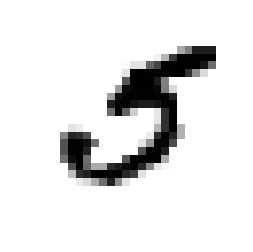

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
# def plot_digit(data):
#     image = data.reshape(28, 28)
#     plt.imshow(image, cmap = mpl.cm.binary,
#                interpolation="nearest")
#     plt.axis("off")

In [ ]:
# def plot_digits(instances, images_per_row=10, **options):
#     size = 28
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size) for instance in instances]
#     n_rows = (len(instances) - 1) // images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(np.zeros((size, size * n_empty)))
#     for row in range(n_rows):
#         rimages = images[row * images_per_row : (row + 1) * images_per_row]
#         row_images.append(np.concatenate(rimages, axis=1))
#     image = np.concatenate(row_images, axis=0)
#     plt.imshow(image, cmap = mpl.cm.binary, **options)
#     plt.axis("off")

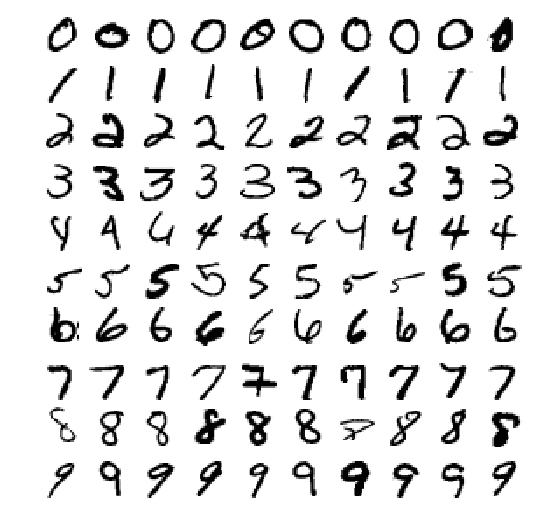

In [ ]:
# plt.figure(figsize=(9,9))
# example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
# plot_digits(example_images, images_per_row=10)
# plt.show()

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [16]:
new_y_train = []
for i in y_train:
    if i%2==0:
        new_y_train.append(True)
    else:
        new_y_train.append(False)     

In [17]:
new_y_test = []
for i in y_test:
    if i%2==0:
        new_y_test.append(True)
    else:
        new_y_test.append(False)     

In [19]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train,new_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import accuracy_score

In [25]:
pered = log_model.predict(X_test)

In [26]:
accuracy_score(new_y_test,pered)

0.9015

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
k=KNeighborsClassifier(n_neighbors=3)

In [29]:
k.fit(X_train,new_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [30]:
v2=k.predict(X_test)

In [31]:
accuracy_score(new_y_test,v2)

0.9852

In [51]:
v2[1222]

False

In [52]:
new_y_test[1222]

False

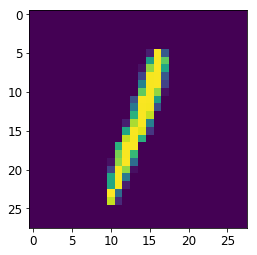

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[1222].reshape(28,28))